## 0. Environment Setup (Run only once)

Run the cells below to set up the environment if not already installed.

In [ ]:
# Install PyTorch and TorchVision with CUDA 12.6
!uv pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

print("PyTorch installation completed!")

In [ ]:
# Install remaining packages from requirements.txt
# Exclude torch, torchvision as they were installed in the previous step
!uv pip install absl-py accelerate aiohappyeyeballs aiohttp aiosignal asttokens attrs \
    beautifulsoup4 certifi cffi charset-normalizer colorama comm contourpy cycler \
    datasets debugpy decorator dill easydict executing filelock fonttools frozenlist \
    fsspec ftfy gdown grpcio hf-xet huggingface-hub idna ipykernel ipython \
    ipython_pygments_lexers jedi Jinja2 jpeg4py jsonpatch jsonpointer jupyter_client \
    jupyter_core kiwisolver lmdb Markdown MarkupSafe matplotlib matplotlib-inline \
    mpmath multidict multiprocess nest-asyncio networkx numpy opencv-python packaging \
    pandas parso pexpect pillow platformdirs prompt_toolkit propcache protobuf psutil \
    ptyprocess pure_eval pyarrow pyarrow-hotfix pycocotools pycparser Pygments pyparsing \
    PySocks python-dateutil pytz PyYAML pyzmq regex requests safetensors scipy setuptools \
    setuptools-scm six soupsieve stack-data sympy tensorboard tensorboard-data-server \
    tikzplotlib timm tokenizers tornado tqdm traitlets transformers triton typing_extensions \
    tzdata urllib3 uv visdom wcwidth webcolors websocket-client Werkzeug wheel xxhash yacs yarl

print("Other packages installation completed!")

In [ ]:
# Install CLIP from GitHub
!uv pip install git+https://github.com/openai/CLIP.git@dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1

print("CLIP installation completed!")

In [ ]:
# Install NVIDIA CUDA packages
!uv pip install nvidia-cublas-cu12 nvidia-cuda-cupti-cu12 nvidia-cuda-nvrtc-cu12 \
    nvidia-cuda-runtime-cu12 nvidia-cudnn-cu12 nvidia-cufft-cu12 nvidia-cufile-cu12 \
    nvidia-curand-cu12 nvidia-cusolver-cu12 nvidia-cusparse-cu12 nvidia-cusparselt-cu12 \
    nvidia-nccl-cu12 nvidia-nvjitlink-cu12 nvidia-nvtx-cu12

print("NVIDIA CUDA packages installation completed!")

In [ ]:
# Verify installation
import torch
import torchvision

print("=" * 60)
print("INSTALLATION VERIFICATION")
print("=" * 60)
print(f"PyTorch version: {torch.__version__}")
print(f"TorchVision version: {torchvision.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
print("=" * 60)
print("✓ All packages installed successfully!")
print("=" * 60)

## 1. Setup và Import

In [ ]:
import os
import sys
import cv2
import torch
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Add project path to sys.path
prj_path = os.path.abspath('.')
if prj_path not in sys.path:
    sys.path.append(prj_path)

print(f"Project path: {prj_path}")
print(f"CUDA available: {torch.cuda.is_available()}")

Project path: /home/thinhnp/MOT/models/SimTrack
CUDA available: True


## 2. Import SimTrack modules

In [2]:
from lib.test.tracker.simtrack import SimTrack
from lib.test.parameter.simtrack import parameters
from lib.test.evaluation.environment import env_settings
from lib.config.simtrack.config import cfg, update_config_from_file

/home/thinhnp/MOT/models/SimTrack/lib/models/stark/backbone_X.py:115: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if phase is 'train':
/home/thinhnp/MOT/models/SimTrack/lib/models/stark/backbone_X.py:163: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if phase is 'train':
/opt/miniconda3/envs/thinh_simtrack/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/miniconda3/envs/thinh_simtrack/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


## 3. Initialize Tracker

In [ ]:
# Load parameters from config file
yaml_name = 'baseline'  # Can be changed to 'baseline_got10k_only' if needed
params = parameters(yaml_name)

# Initialize tracker
tracker = SimTrack(params, dataset_name='custom')

print("Tracker initialized successfully!")
print(f"Template size: {params.template_size}")
print(f"Search size: {params.search_size}")

test config:  {'MODEL': {'HEAD_TYPE': 'CORNER', 'HIDDEN_DIM': 256, 'NUM_OBJECT_QUERIES': 1, 'POSITION_EMBEDDING': 'sine', 'PREDICT_MASK': False, 'BACKBONE': {'TYPE': 'ViT-B/16', 'NUM_FEA': 768, 'TEMPLATE_SZ': 112, 'SEARCH_SZ': 224, 'WINDOW_SZ': 16, 'FOVEAL_SZ': 64, 'DILATION': False}}, 'TRAIN': {'LR': 0.0001, 'WEIGHT_DECAY': 0.0001, 'EPOCH': 50, 'LR_DROP_EPOCH': 40, 'BATCH_SIZE': 64, 'NUM_WORKER': 8, 'OPTIMIZER': 'ADAMW', 'BACKBONE_MULTIPLIER': 0.1, 'GIOU_WEIGHT': 2.0, 'L1_WEIGHT': 5.0, 'DEEP_SUPERVISION': False, 'FREEZE_BACKBONE_BN': False, 'FREEZE_LAYERS': [], 'PRINT_INTERVAL': 40, 'VAL_EPOCH_INTERVAL': 20, 'GRAD_CLIP_NORM': 0.1, 'SCHEDULER': {'TYPE': 'step', 'DECAY_RATE': 0.1}}, 'DATA': {'MEAN': [0.485, 0.456, 0.406], 'STD': [0.229, 0.224, 0.225], 'MAX_SAMPLE_INTERVAL': 200, 'TRAIN': {'DATASETS_NAME': ['LASOT', 'GOT10K_vottrain', 'COCO17', 'TRACKINGNET'], 'DATASETS_RATIO': [1, 1, 1, 1], 'SAMPLE_PER_EPOCH': 60000}, 'VAL': {'DATASETS_NAME': ['GOT10K_votval'], 'DATASETS_RATIO': [1], 'S

## 4. Load Sequence Data

In [ ]:
# Path to sequence
sequence_path = "/mnt/VLAI_data/MVTD/train/1-Ship/"

# Read groundtruth.txt to determine number of frames
gt_file = os.path.join(sequence_path, "groundtruth.txt")
if os.path.exists(gt_file):
    with open(gt_file, 'r') as f:
        gt_lines = f.readlines()
    num_frames = len(gt_lines)
    
    # Create list of image files from 00000001.jpg to 0000XXXX.jpg
    img_folder = sequence_path
    img_files = [os.path.join(img_folder, f"{i:08d}.jpg") for i in range(1, num_frames + 1)]
    
    print(f"Number of frames from groundtruth.txt: {num_frames}")
    print(f"First frame: {img_files[0]}")
    print(f"Last frame: {img_files[-1]}")
    
    # Read first bbox from groundtruth.txt (format: x, y, w, h)
    first_line = gt_lines[0].strip().split(',')
    init_bbox = [float(x) for x in first_line[:4]]
    print(f"Initial bbox from groundtruth.txt: {init_bbox}")
else:
    print(f"File not found: {gt_file}")
    print("Please check the path.")
    init_bbox = None
    img_files = []

Số lượng frames từ groundtruth.txt: 1470
Frame đầu tiên: /mnt/VLAI_data/MVTD/train/1-Ship/00000001.jpg
Frame cuối cùng: /mnt/VLAI_data/MVTD/train/1-Ship/00001470.jpg
Initial bbox from groundtruth.txt: [554.0, 184.0, 683.0, 358.0]


## 5. Select or Display Initial Bounding Box

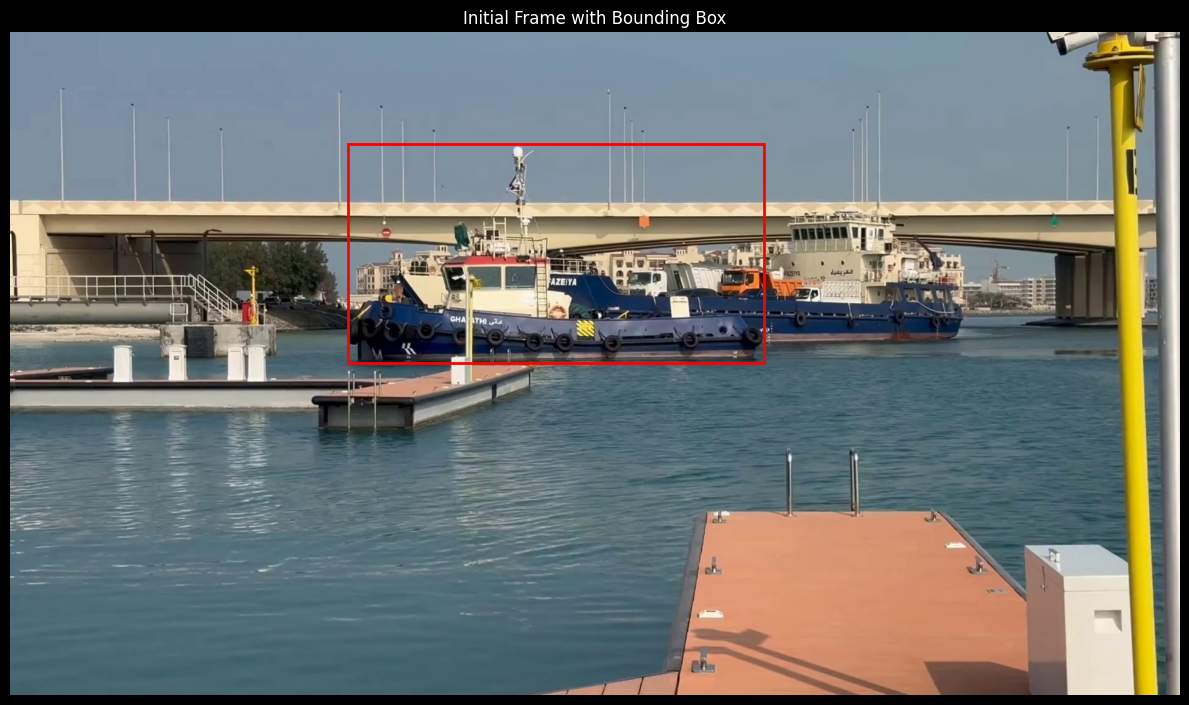

Initial bbox: [554.0, 184.0, 683.0, 358.0]


In [ ]:
# Read first frame
first_frame = cv2.imread(img_files[0])
first_frame_rgb = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)

# If no bbox from GT, use cv2.selectROI to select bbox
if init_bbox is None:
    print("Please select the object region to track in the window...")
    bbox = cv2.selectROI("Select Object", first_frame, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()
    init_bbox = [bbox[0], bbox[1], bbox[2], bbox[3]]  # [x, y, w, h]
    print(f"Selected bbox: {init_bbox}")

# Display first frame with bbox
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(first_frame_rgb)
rect = Rectangle((init_bbox[0], init_bbox[1]), init_bbox[2], init_bbox[3], 
                  linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.set_title('Initial Frame with Bounding Box')
ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Initial bbox: {init_bbox}")

## 6. Initialize Tracker

In [ ]:
# Initialize tracker with first frame and bbox
init_info = {'init_bbox': init_bbox}
tracker.initialize(first_frame_rgb, init_info)

print("Tracker initialized with the first frame!")

Tracker initialized with the first frame!


## 7. Run Tracking on Entire Sequence

In [ ]:
# Store tracking results
tracking_results = []

# Track from second frame onwards
for idx, img_path in enumerate(img_files[1:], start=2):
    # Read frame
    frame = cv2.imread(img_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Track
    outputs = tracker.track(frame_rgb)
    pred_bbox = outputs['target_bbox']
    
    # Save result
    tracking_results.append({
        'frame_id': idx,
        'bbox': pred_bbox,
        'image_path': img_path
    })
    
    if idx % 50 == 0:
        print(f"Processed frame {idx}/{len(img_files)}")

print(f"\nTracking completed! Total frames processed: {len(tracking_results)}")

Processed frame 50/1470
Processed frame 100/1470
Processed frame 100/1470
Processed frame 150/1470
Processed frame 150/1470
Processed frame 200/1470
Processed frame 200/1470
Processed frame 250/1470
Processed frame 250/1470
Processed frame 300/1470
Processed frame 300/1470
Processed frame 350/1470
Processed frame 350/1470
Processed frame 400/1470
Processed frame 400/1470
Processed frame 450/1470
Processed frame 450/1470
Processed frame 500/1470
Processed frame 500/1470
Processed frame 550/1470
Processed frame 550/1470
Processed frame 600/1470
Processed frame 600/1470
Processed frame 650/1470
Processed frame 650/1470
Processed frame 700/1470
Processed frame 700/1470
Processed frame 750/1470
Processed frame 750/1470
Processed frame 800/1470
Processed frame 800/1470
Processed frame 850/1470
Processed frame 850/1470
Processed frame 900/1470
Processed frame 900/1470
Processed frame 950/1470
Processed frame 950/1470
Processed frame 1000/1470
Processed frame 1000/1470
Processed frame 1050/147

## 8. Visualize Results

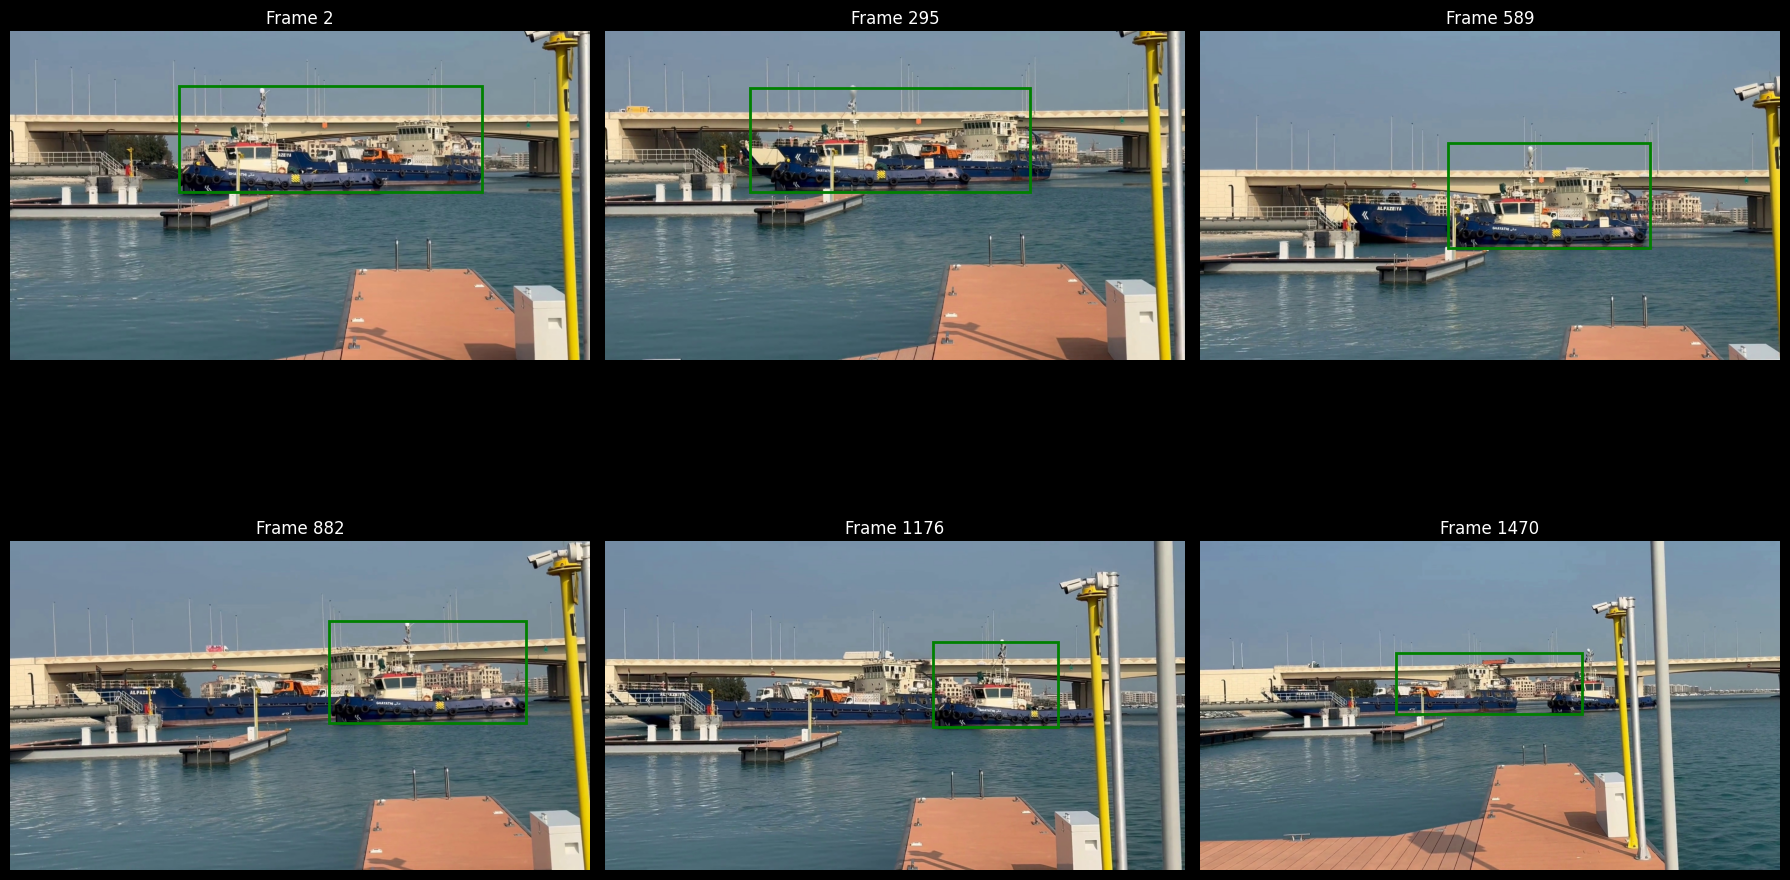

In [ ]:
# Display some sample frames
num_samples = min(6, len(tracking_results))
sample_indices = np.linspace(0, len(tracking_results)-1, num_samples, dtype=int)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, idx in enumerate(sample_indices):
    result = tracking_results[idx]
    img = cv2.imread(result['image_path'])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    bbox = result['bbox']
    
    axes[i].imshow(img_rgb)
    rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], 
                      linewidth=2, edgecolor='g', facecolor='none')
    axes[i].add_patch(rect)
    axes[i].set_title(f"Frame {result['frame_id']}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 9. Save Tracking Results

In [ ]:
# Create output directory if it doesn't exist
output_dir = "output/inference_results"
os.makedirs(output_dir, exist_ok=True)

# Save results as text file (MOT format)
output_file = os.path.join(output_dir, "1-Ship_tracking.txt")
with open(output_file, 'w') as f:
    # First frame
    f.write(f"1,1,{init_bbox[0]:.2f},{init_bbox[1]:.2f},{init_bbox[2]:.2f},{init_bbox[3]:.2f},1,-1,-1,-1\n")
    # Remaining frames
    for result in tracking_results:
        bbox = result['bbox']
        frame_id = result['frame_id']
        f.write(f"{frame_id},1,{bbox[0]:.2f},{bbox[1]:.2f},{bbox[2]:.2f},{bbox[3]:.2f},1,-1,-1,-1\n")

print(f"Results saved to: {output_file}")

# Save video results (optional)
save_video = True
if save_video:
    video_output = os.path.join(output_dir, "1-Ship_tracking.mp4")
    
    # Get frame dimensions
    sample_frame = cv2.imread(img_files[0])
    height, width = sample_frame.shape[:2]
    
    # Create video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_output, fourcc, 20.0, (width, height))
    
    # First frame
    frame = first_frame.copy()
    x, y, w, h = [int(v) for v in init_bbox]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(frame, 'Frame 1', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    out.write(frame)
    
    # Remaining frames
    for result in tracking_results:
        frame = cv2.imread(result['image_path'])
        bbox = result['bbox']
        x, y, w, h = [int(v) for v in bbox]
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f"Frame {result['frame_id']}", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        out.write(frame)
    
    out.release()
    print(f"Video saved to: {video_output}")

Kết quả đã được lưu vào: output/inference_results/1-Ship_tracking.txt
Video đã được lưu vào: output/inference_results/1-Ship_tracking.mp4
Video đã được lưu vào: output/inference_results/1-Ship_tracking.mp4


## 10. Summary

In [ ]:
print("=" * 50)
print("TRACKING SUMMARY")
print("=" * 50)
print(f"Sequence: 1-Ship")
print(f"Total frames: {len(img_files)}")
print(f"Initial bbox: {init_bbox}")
print(f"Results saved to: {output_dir}")
print("=" * 50)

TRACKING SUMMARY
Sequence: 1-Ship
Total frames: 1470
Initial bbox: [554.0, 184.0, 683.0, 358.0]
Results saved to: output/inference_results
